# Prescence of HEART DISEASE 

## EDA -1 

**Importing basice packages**








In [0]:
import pandas as pd
import numpy as np
from scipy.stats import randint as sp_randint
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [0]:
warnings.filterwarnings("ignore")

**General Insights**

In [0]:
heart_data = pd.read_csv('heart.csv')


**Attribute Information: **

*  **age: age in years**

*   **sex: sex** (1 = male; 0 = female)

*   **cp: chest pain type** -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic 10

*  **trestbps: resting blood pressure** (in mm Hg on admission to the hospital)

*   **chol: serum cholestoral** in mg/dl

*  **fbs: (fasting blood sugar > 120 mg/dl)** (1 = true; 0 = false)

*   **restecg: resting electrocardiographic results** -- Value 0: normal -- Value 1: having ST-T wave abnormality 
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 20 ekgmo

*   ** thalach: maximum heart rate achieved**
*  **exang: exercise induced angina **(1 = yes; 0 = no)


*  ** oldpeak = ST depression induced by exercise relative to rest**


*   **slope: the slope of the peak exercise ST segment** -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping


*   **ca: number of major vessels** (0-3) colored by flourosopy


*   ** thal: thalassemia**-- 3 = normal; 6 = fixed defect; 7 = reversable defect




In [5]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
print('Number of Rows:', heart_data.shape[0])
print('Number of Feautures:', heart_data.shape[1])

Number of Rows: 303
Number of Feautures: 14


In [7]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


No Null Values found. Good Data Collection

**For the purpose of Data Anaysis lets convert the numerical columns to categorical columns for better understanding**

In [0]:
heart_data.columns = ['Age', 'Sex',  'Chest_pain_type', 'Resting_blood_pressure', 'Serum_cholestoral(mg/dl)', 'Fasting_blood_sugar(mg/dl)', 'Resting_ECG_results', 'Max_heart_rate'
                    , 'Exercise_induced_angina', 'Oldpeak', 'Slope', 'No.of_major_vessels', 'thalassemia','target']

In [9]:
heart_data.head()

,Age,Sex,Chest_pain_type,Resting_blood_pressure,Serum_cholestoral(mg/dl),Fasting_blood_sugar(mg/dl),Resting_ECG_results,Max_heart_rate,Exercise_induced_angina,Oldpeak,Slope,No.of_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
data_sample = heart_data.copy()

In [0]:
data_sample['Sex'][data_sample['Sex']==1]='Male' 
data_sample['Sex'][data_sample['Sex']==0]='Female'

data_sample['Chest_pain_type'][data_sample['Chest_pain_type'] == 1] = 'typical angina' 
data_sample['Chest_pain_type'][data_sample['Chest_pain_type'] == 2] = 'atypical angina' 
data_sample['Chest_pain_type'][data_sample['Chest_pain_type'] == 3] = 'non-anginal pain' 
data_sample['Chest_pain_type'][data_sample['Chest_pain_type'] == 4] = 'asymptomatic'

data_sample['Fasting_blood_sugar(mg/dl)'][data_sample['Fasting_blood_sugar(mg/dl)'] == 0] = 'lower than 120mg/ml' 
data_sample['Fasting_blood_sugar(mg/dl)'][data_sample['Fasting_blood_sugar(mg/dl)'] == 1] = 'greater than 120mg/ml'

data_sample['Resting_ECG_results'][data_sample['Resting_ECG_results'] == 0] = 'normal' 
data_sample['Resting_ECG_results'][data_sample['Resting_ECG_results'] == 1] = 'ST-T wave abnormality' 
data_sample['Resting_ECG_results'][data_sample['Resting_ECG_results'] == 2] = 'left ventricular hypertrophy'

data_sample['Exercise_induced_angina'][data_sample['Exercise_induced_angina'] == 0] = 'no' 
data_sample['Exercise_induced_angina'][data_sample['Exercise_induced_angina'] == 1] = 'yes'

data_sample['Slope'][data_sample['Slope'] == 1] = 'upsloping' 
data_sample['Slope'][data_sample['Slope'] == 2] = 'flat' 
data_sample['Slope'][data_sample['Slope'] == 3] = 'downsloping'

data_sample['thalassemia'][data_sample['thalassemia'] == 1] = 'normal' 
data_sample['thalassemia'][data_sample['thalassemia'] == 2] = 'fixed defect' 
data_sample['thalassemia'][data_sample['thalassemia'] == 3] = 'reversable defect'


In [12]:
heart_data.head()

,Age,Sex,Chest_pain_type,Resting_blood_pressure,Serum_cholestoral(mg/dl),Fasting_blood_sugar(mg/dl),Resting_ECG_results,Max_heart_rate,Exercise_induced_angina,Oldpeak,Slope,No.of_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
print(data_sample['Sex'].unique())
print(data_sample['Chest_pain_type'].unique())
print(data_sample['Fasting_blood_sugar(mg/dl)'].unique())
print(data_sample['Resting_ECG_results'].unique())
print(data_sample['Exercise_induced_angina'].unique())
print(data_sample['Slope'].unique())
print(data_sample['thalassemia'].unique())

['Male' 'Female']
['non-anginal pain' 'atypical angina' 'typical angina' 0]
['greater than 120mg/ml' 'lower than 120mg/ml']
['normal' 'ST-T wave abnormality' 'left ventricular hypertrophy']
['no' 'yes']
[0 'flat' 'upsloping']
['normal' 'fixed defect' 'reversable defect' 0]


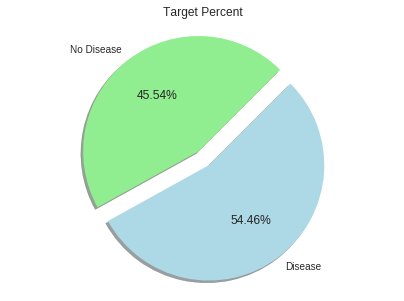

In [14]:
def plot1():
  plt.figure(figsize=(7, 5))
  target_count = [len(data_sample[data_sample['target'] == 0]),len(data_sample[data_sample['target'] == 1])]
  labels = ['No Disease', 'Disease']
  colors = ['lightgreen', 'lightblue']
  explode = (0.05, 0.1)
  plt.pie(target_count, explode=explode, labels=labels, 
        colors=colors,autopct='%4.2f%%',shadow=True, startangle=45)
  plt.title('Target Percent')
  plt.axis('equal')
  plt.show()  
plot1()

We have almost equaly distributed target. Not prone to class imbalance

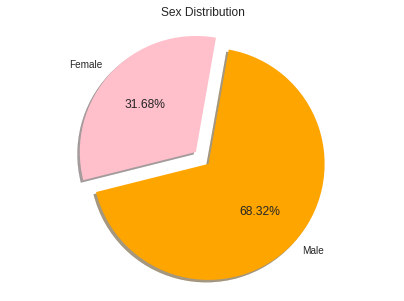

In [15]:
def plot2():
  plt.figure(figsize=(7, 5))
  sex_count = [len(data_sample[data_sample['Sex'] == 'Female']),len(data_sample[data_sample['Sex'] == 'Male'])]
  labels = ['Female', 'Male']
  colors = ['pink', 'orange']
  explode = (0.05, 0.1)
  plt.pie(sex_count, explode=explode, labels=labels, 
        colors=colors,autopct='%4.2f%%',shadow=True, startangle=80)
  plt.title('Sex Distribution')
  plt.axis('equal')
  plt.show()
  
plot2()

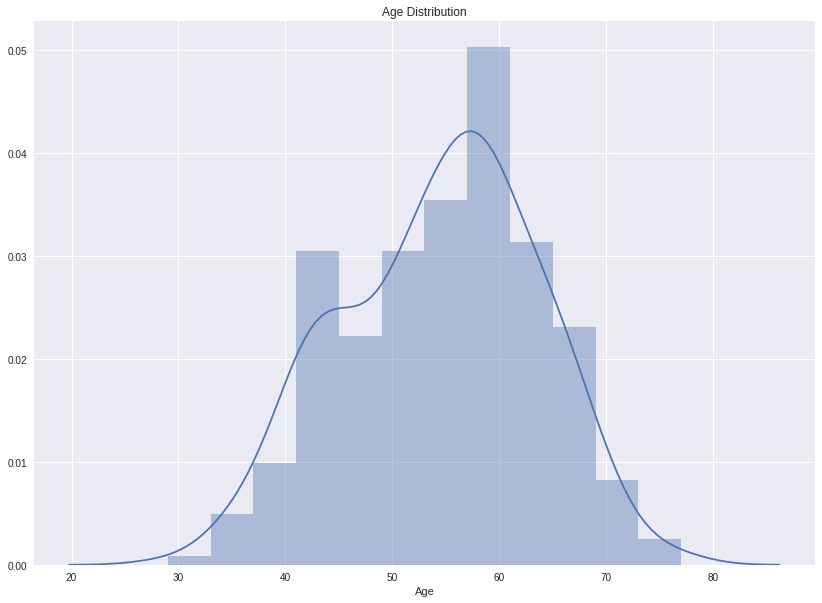

In [16]:
def plot3():
    plt.figure(figsize=(14,10))
    sns.distplot(data_sample['Age'])
    plt.title('Age Distribution')
    plt.show()
plot3()   

Age seems to be somewhat normally distributed

In [17]:
data_sample.head()

,Age,Sex,Chest_pain_type,Resting_blood_pressure,Serum_cholestoral(mg/dl),Fasting_blood_sugar(mg/dl),Resting_ECG_results,Max_heart_rate,Exercise_induced_angina,Oldpeak,Slope,No.of_major_vessels,thalassemia,target
0,63,Male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,1
1,37,Male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,1
2,41,Female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,Male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,Female,0,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1


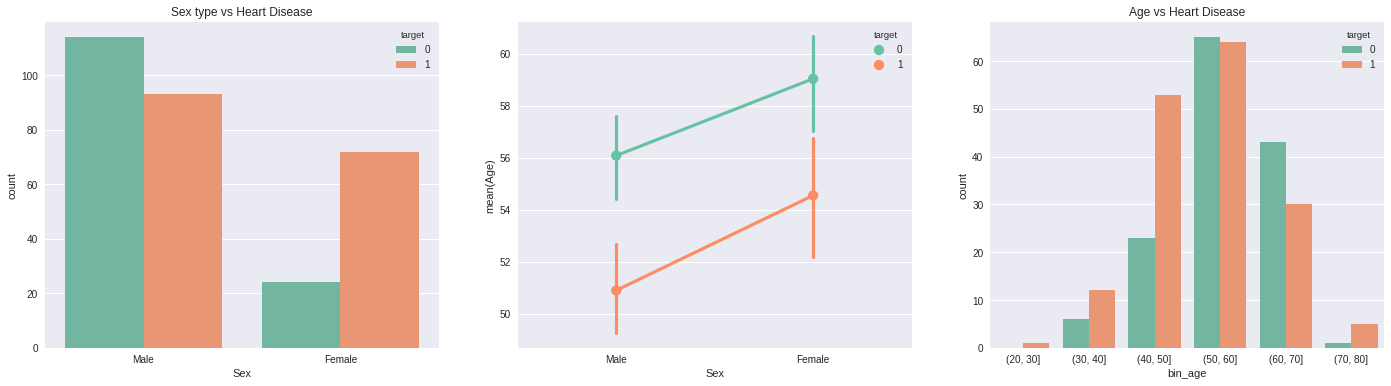

In [18]:
def plot4():
  
    plt.figure(figsize=(24,6))
  
    age_bins = [20,30,40,50,60,70,80]
    data_sample['bin_age'] = pd.cut(data_sample['Age'], bins=age_bins)
  
    plt.subplot(1,3,1)
    p1 = sns.countplot(x='Sex', data=data_sample, hue='target', palette='Set2')
    p1.set_title('Sex type vs Heart Disease')
    
    plt.subplot(1,3,2)
    p2 = sns.pointplot(x='Sex', y='Age', data=data_sample, hue='target', palette='Set2')
    p1.set_title('Sex type vs Heart Disease')
        
    plt.subplot(1,3,3)
    p3 = sns.countplot(x='bin_age', data=data_sample, hue='target', palette='Set2')
    p3.set_title('Age vs Heart Disease')
    
plot4()

**Insights: **

**Figure1 shows that Male are more likely to get heart disease**

**Figure 2 shows that mean age for female with heart disease is 54 and male with heart disease is 51 **

**Figure 3  shows Ages between 40 to 70 are more likely to have heart diseas**


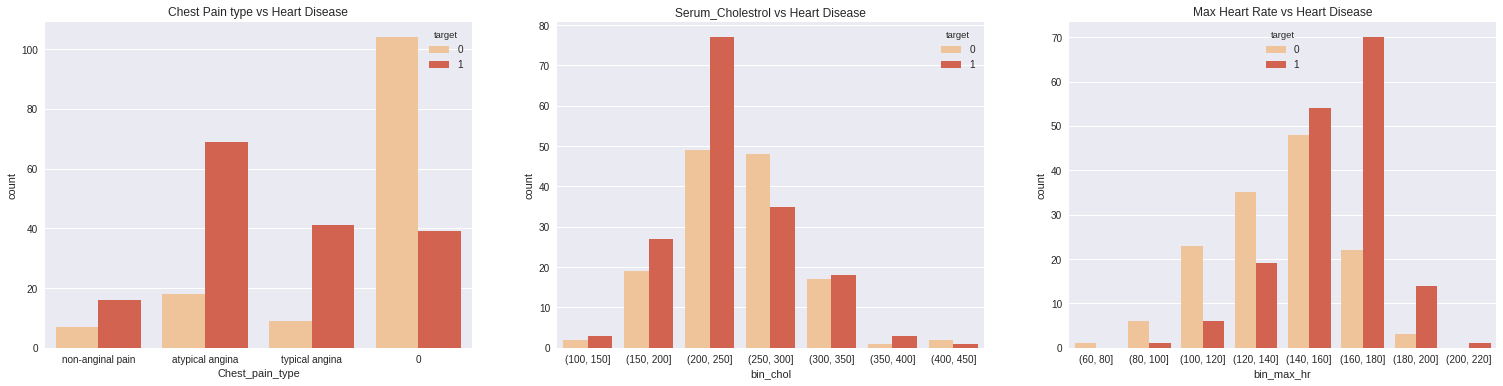

In [19]:
def plot5():
  
    plt.figure(figsize=(26,6))
    chol_bins = [100,150,200,250,300,350,400,450]
    max_hr_bins = [60,80,100,120,140,160,180,200,220]
    
    data_sample['bin_chol'] = pd.cut(data_sample['Serum_cholestoral(mg/dl)'], bins=chol_bins)
    data_sample['bin_max_hr'] = pd.cut(data_sample['Max_heart_rate'], bins=max_hr_bins)
    
    plt.subplot(1,3,1)
    p1 = sns.countplot(x='Chest_pain_type', data=data_sample, hue='target', palette='OrRd')
    p1.set_title('Chest Pain type vs Heart Disease')
        
    plt.subplot(1,3,2)
    p2 = sns.countplot(x='bin_chol', data=data_sample, hue='target', palette='OrRd')
    p2.set_title('Serum_Cholestrol vs Heart Disease')
    
    plt.subplot(1,3,3)
    p3 = sns.countplot(x='bin_max_hr', data=data_sample, hue='target', palette='OrRd')
    p3.set_title('Max Heart Rate vs Heart Disease')
    
plot5()
  

**Insights:**

**Figure 1 : Shows atypical angina chest pain resulted in more heart disease**

**Figure 2 : ShowsCholestrol Range of 200 - 300 have resulted in heart disease**

**Figure 3 : Shows Max Heart rate between 140 to 180 have resulted in heart disease**

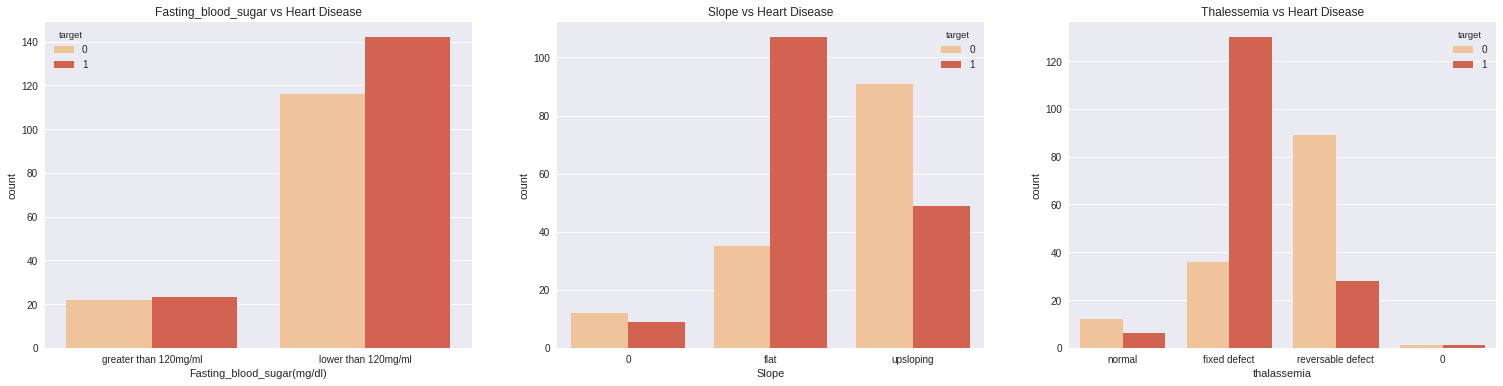

In [20]:
def plot6():
    plt.figure(figsize=(26,6))
    plt.subplot(1,3,1)
    p1 = sns.countplot(x='Fasting_blood_sugar(mg/dl)', data=data_sample, hue='target', palette='OrRd')
    p1.set_title('Fasting_blood_sugar vs Heart Disease')
        
    plt.subplot(1,3,2)
    p2 = sns.countplot(x='Slope', data=data_sample, hue='target', palette='OrRd')
    p2.set_title('Slope vs Heart Disease')
    
    plt.subplot(1,3,3)
    p3 = sns.countplot(x='thalassemia', data=data_sample, hue='target', palette='OrRd')
    p3.set_title('Thalessemia vs Heart Disease')
plot6()

**Insights:**

**Figure 1 : Shows Blood Sugar level lower than 120mg/ml has resulted in more heart disease**

**Figure 2 : Shows Slope type of flat have resulted in heart disease**

**Figure 3 : Shows thalassemai type of fixed defect have resulted in heart disease**

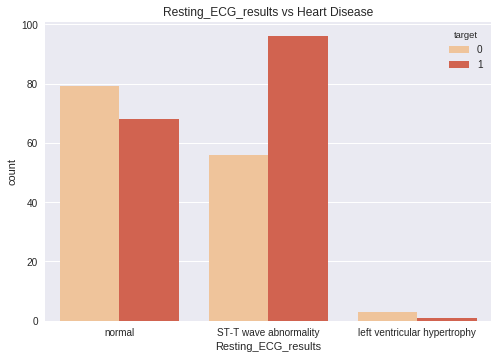

In [21]:
def plot11():
    plt.figure(figsize=(14,8))
    plt.subplot(1,3,1)
    p1 = sns.countplot(x='Fasting_blood_sugar(mg/dl)', data=data_sample, hue='target', palette='OrRd')
    p1.set_title('Fasting_blood_sugar vs Heart Disease')
         
  
    p1 = sns.countplot(x='Resting_ECG_results', data=data_sample, hue='target', palette='OrRd')
    p1.set_title('Resting_ECG_results vs Heart Disease')
    
plot11()

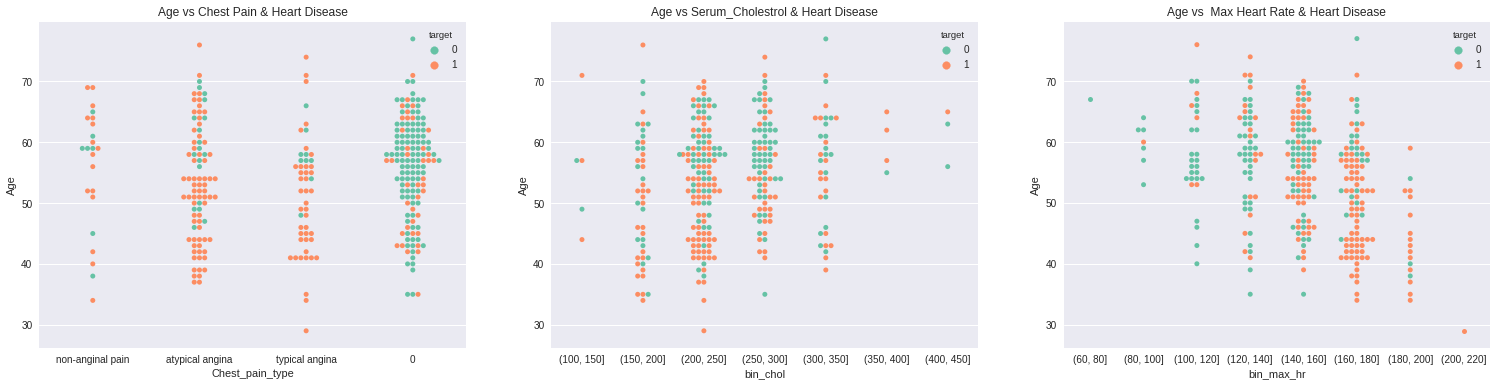

In [22]:
def plot7():
    plt.figure(figsize=(26,6))
    
    plt.subplot(1,3,1)
    p1 = sns.swarmplot(x='Chest_pain_type', y='Age', data=data_sample, hue='target', palette='Set2')
    p1.set_title('Age vs Chest Pain & Heart Disease')
        
    plt.subplot(1,3,2)
    p2 = sns.swarmplot(x='bin_chol', y='Age', data=data_sample, hue='target', palette='Set2')
    p2.set_title('Age vs Serum_Cholestrol & Heart Disease')
    
    plt.subplot(1,3,3)
    p3 = sns.swarmplot(x='bin_max_hr',y='Age', data=data_sample, hue='target', palette='Set2')
    p3.set_title('Age vs  Max Heart Rate & Heart Disease')
plot7()

**Insights:**

**Figure 1 : Important note here - Chest pain type makes an important factor for having heart disesese because most of the cases with target 1 have chest                      pain**

**Figure 2 : Cholestrol level 200-250 is more among the age range 40 - 60**

**Figure 3 : Max heart rate between 160-180 that have led to heart disease are more likely to occur for age group of 40-50**

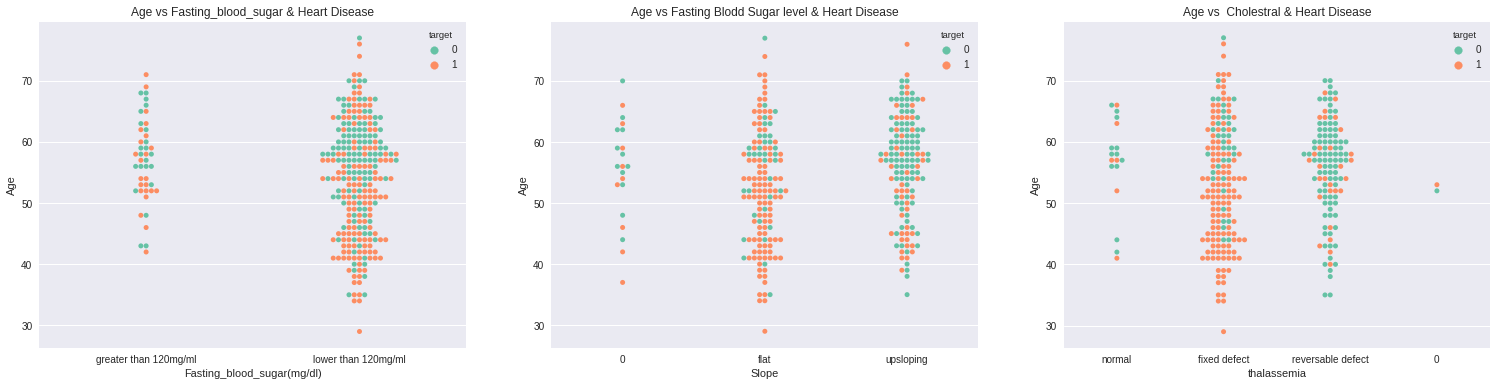

In [23]:
def plot8():
    plt.figure(figsize=(26,6))
    
    plt.subplot(1,3,1)
    p1 = sns.swarmplot(x='Fasting_blood_sugar(mg/dl)', y='Age', data=data_sample, hue='target', palette='Set2')
    p1.set_title('Age vs Fasting_blood_sugar & Heart Disease')
        
    plt.subplot(1,3,2)
    p2 = sns.swarmplot(x='Slope', y='Age', data=data_sample, hue='target', palette='Set2')
    p2.set_title('Age vs Fasting Blodd Sugar level & Heart Disease')
    
    plt.subplot(1,3,3)
    p3 = sns.swarmplot(x='thalassemia',y='Age', data=data_sample, hue='target', palette='Set2')
    p3.set_title('Age vs  Cholestral & Heart Disease')
plot8()

**Insights:**

**Figure 1 : Important note here - Most of our observation shows Blood sugar level lower than 120mg/ml**

**Figure 2 : Distribution of slope type with ages**

**Figure 3 : Important note here - Thalassemia type of fixed defect that have led to heart disease are more likely to occur for age group of 40-55**

In [24]:
data_sample.head()

,Age,Sex,Chest_pain_type,Resting_blood_pressure,Serum_cholestoral(mg/dl),Fasting_blood_sugar(mg/dl),Resting_ECG_results,Max_heart_rate,Exercise_induced_angina,Oldpeak,Slope,No.of_major_vessels,thalassemia,target,bin_age,bin_chol,bin_max_hr
0,63,Male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,1,"(60, 70]","(200, 250]","(140, 160]"
1,37,Male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,1,"(30, 40]","(200, 250]","(180, 200]"
2,41,Female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1,"(40, 50]","(200, 250]","(160, 180]"
3,56,Male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1,"(50, 60]","(200, 250]","(160, 180]"
4,57,Female,0,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1,"(50, 60]","(350, 400]","(160, 180]"


# MACHINE LEARNING

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [26]:
X = heart_data.loc[:, heart_data.columns!='target']
X.head()

,Age,Sex,Chest_pain_type,Resting_blood_pressure,Serum_cholestoral(mg/dl),Fasting_blood_sugar(mg/dl),Resting_ECG_results,Max_heart_rate,Exercise_induced_angina,Oldpeak,Slope,No.of_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [27]:
y = heart_data.loc[:, heart_data.columns=='target']
y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.30, stratify=y )

In [29]:
print(X_train.shape)
print(X_test.shape)

(212, 13)
(91, 13)


In [30]:
print(y_train.shape)
print(y_test.shape)

(212, 1)
(91, 1)


**Model 1 : Decision Tree**

In [31]:
def tree1():
  
   return DecisionTreeClassifier(random_state=1)
  
Model1 = tree1()
Model1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [32]:
prediction_model1 = Model1.predict(X_test)
accuracy_score(y_test, prediction_model1)

0.7032967032967034

In [33]:
modle1_matrix = pd.DataFrame()
model1_matrix = pd.DataFrame(confusion_matrix(y_test, prediction_model1))
model1_matrix.index = ['Actual No Disease','Actual Disease']
model1_matrix.columns = ['Predicted No Disease','Predicted Disease']
model1_matrix

,Predicted No Disease,Predicted Disease
Actual No Disease,31,10
Actual Disease,17,33



---


**Model 2: Decision tree with Gridsearchcv**

In [34]:
def tree2():
  
  dtree = DecisionTreeClassifier(random_state=1)
  params = {'splitter':['best'],  'max_depth': range(2,60),
             'min_samples_split': [2,3,4,5,6,7,8,9,10],
            'max_features':['sqrt','log2',None]}
  
  return GridSearchCV(dtree, params, cv=10)

Model2 = tree2()
Model2.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'splitter': ['best'], 'max_depth': range(2, 60), 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': ['sqrt', 'log2', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
prediction_model2 = Model2.predict(X_test)
accuracy_score(y_test,prediction_model2)

0.7912087912087912

In [36]:
print(Model2.best_params_)
print(Model2.best_score_)

{'max_depth': 3, 'max_features': None, 'min_samples_split': 2, 'splitter': 'best'}
0.7641509433962265


In [37]:
modle2_matrix = pd.DataFrame()
model2_matrix = pd.DataFrame(confusion_matrix(y_test, prediction_model2))
model2_matrix.index = ['Actual No Disease','Actual Disease']
model2_matrix.columns = ['Predicted No Disease','Predicted Disease']
model2_matrix

,Predicted No Disease,Predicted Disease
Actual No Disease,32,9
Actual Disease,10,40




---



**Model 3: Random Forest**

In [38]:
def tree3():
  
  return RandomForestClassifier(random_state=1)
  
Model3 = tree3()
Model3.fit(X_train,y_train)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [39]:
prediction_model3 = Model3.predict(X_test)
print(accuracy_score(y_test,prediction_model3))

0.8351648351648352


In [40]:
modle3_matrix = pd.DataFrame()
model3_matrix = pd.DataFrame(confusion_matrix(y_test, prediction_model3))
model3_matrix.index = ['Actual No Disease','Actual Disease']
model3_matrix.columns = ['Predicted No Disease','Predicted Disease']
model3_matrix

,Predicted No Disease,Predicted Disease
Actual No Disease,34,7
Actual Disease,8,42




---



**Model 4: Random Forest with RandomizedSearchCV**

In [41]:
def tree4():
  
  rf = RandomForestClassifier(random_state=1)
  params = {"max_depth": range(2,5),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "n_estimators": [100, 400, 700, 1000, 1500],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }
  n_iter = 50

  return RandomizedSearchCV(rf, param_distributions = params, n_iter = n_iter, n_jobs=-1)
  
Model4 = tree4()
Model4.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'max_depth': range(2, 5), 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2c16285d30>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2c15f6d240>, 'bootstrap': [True, False], 'n_estimators': [100, 400, 700, 1000, 1500], 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2', None]},
          pre_dispatch='2*n_jobs', random_state=None

In [42]:
prediction_model4 = Model4.predict(X_test)
print(accuracy_score(y_test,prediction_model4))

0.8351648351648352


In [43]:
print('Best Prameters:', Model4.best_params_)
print('Best Score:', Model4.best_score_)

Best Prameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
Best Score: 0.8207547169811321


In [44]:
modle4_matrix = pd.DataFrame()
model4_matrix = pd.DataFrame(confusion_matrix(y_test, prediction_model4))
model4_matrix.index = ['Actual No Disease','Actual Disease']
model4_matrix.columns = ['Predicted No Disease','Predicted Disease']
model4_matrix

,Predicted No Disease,Predicted Disease
Actual No Disease,31,10
Actual Disease,5,45




---



**Normalizing the values for the upcoming models**

In [0]:
scaler = StandardScaler().fit(X)
X1 = scaler.transform(X)

In [46]:
X1 = pd.DataFrame(X1)
X1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [0]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1, y, random_state=1, test_size=0.30, stratify=y)

**Model 5 :  KNN - By finding best value of K**

In [48]:
accuracy_list = []

def knn1():
  for i in range(1,30):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X1_train,y1_train)
    pred = model.predict(X1_test)
    accuracy_list.append(accuracy_score(y1_test,pred))
       
  print("Max accuracy and its k value is:", max([(v,i+1) for i, v in enumerate(accuracy_list)])) 

knn1()

Max accuracy and its k value is: (0.8901098901098901, 14)


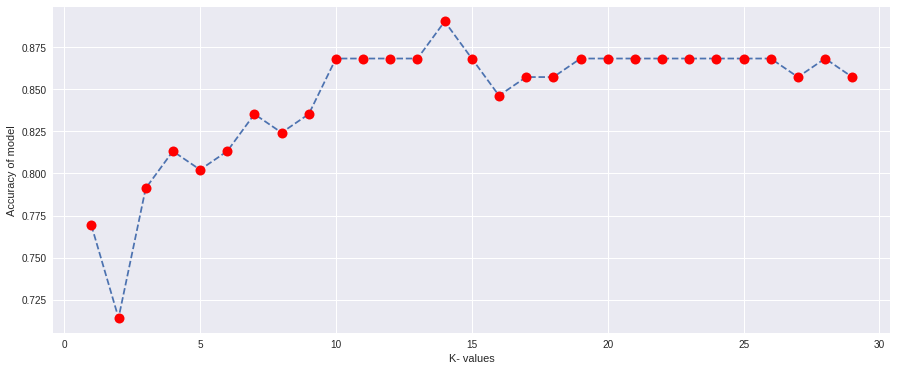

In [49]:
def k_plot():
  plt.figure(figsize=(15,6))
  plt.plot(range(1,30), accuracy_list, linestyle='dashed', marker='o', markerfacecolor='red', markersize='10')
  plt.xlabel('K- values')
  plt.ylabel('Accuracy of model')
  plt.show()
k_plot()    

In [50]:
Model5 = KNeighborsClassifier(n_neighbors = 14)
Model5.fit(X1_train, y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=14, p=2,
           weights='uniform')

In [51]:
prediction_model5 = Model5.predict(X1_test)
accuracy_score(y1_test,prediction_model5)

0.8901098901098901

In [52]:
modle5_matrix = pd.DataFrame()
model5_matrix = pd.DataFrame(confusion_matrix(y1_test, prediction_model5))
model5_matrix.index = ['Actual No Disease','Actual Disease']
model5_matrix.columns = ['Predicted No Disease','Predicted Disease']
model5_matrix

,Predicted No Disease,Predicted Disease
Actual No Disease,35,6
Actual Disease,4,46




---



**Model 6: Knn with RandomizedSearchCV**

In [53]:
def knn2():
  
  knn = KNeighborsClassifier()
  params = {'n_neighbors':range(14,20),
          'algorithm':['auto','ball_tree'],
          'leaf_size':2**np.arange(10),
          'metric':['euclidean','manhattan','minkowski','chebyshev']}
  n_iter_search = 25

  return RandomizedSearchCV(knn, random_state=0, param_distributions = params, n_iter = n_iter_search, n_jobs=-1)
  
Model6 = knn2()
Model6.fit(X1_train,y1_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params=None, iid='warn', n_iter=25, n_jobs=-1,
          param_distributions={'n_neighbors': range(14, 20), 'algorithm': ['auto', 'ball_tree'], 'leaf_size': array([  1,   2,   4,   8,  16,  32,  64, 128, 256, 512]), 'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev']},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [54]:
prediction_model6 = Model6.predict(X1_test)
accuracy_score(y1_test,prediction_model6)

0.8681318681318682

In [55]:
Model6.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 256,
 'metric': 'manhattan',
 'n_neighbors': 17}

In [56]:
modle6_matrix = pd.DataFrame()
model6_matrix = pd.DataFrame(confusion_matrix(y1_test, prediction_model6))
model6_matrix.index = ['Actual No Disease','Actual Disease']
model6_matrix.columns = ['Predicted No Disease','Predicted Disease']
model6_matrix

,Predicted No Disease,Predicted Disease
Actual No Disease,34,7
Actual Disease,5,45




---



**Model 7: SVC**

In [57]:
def svc():
  
  return  SVC(kernel='linear')

Model7 = SVC()
Model7.fit(X1_train, y1_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [58]:
prediction_model7 = Model7.predict(X1_test)
accuracy_score(y1_test,prediction_model7)

0.8351648351648352

In [59]:
modle7_matrix = pd.DataFrame()
model7_matrix = pd.DataFrame(confusion_matrix(y1_test, prediction_model7))
model7_matrix.index = ['Actual No Disease','Actual Disease']
model7_matrix.columns = ['Predicted No Disease','Predicted Disease']
model7_matrix

,Predicted No Disease,Predicted Disease
Actual No Disease,33,8
Actual Disease,7,43




---



**Model 8: Naive_bayes**

In [60]:
def naive():
  return GaussianNB()
Model8 = GaussianNB()
Model8.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [61]:
prediction_model8 = Model8.predict(X_test)
accuracy_score(y_test,prediction_model8)

0.8131868131868132

In [62]:
modle8_matrix = pd.DataFrame()
model8_matrix = pd.DataFrame(confusion_matrix(y1_test, prediction_model8))
model8_matrix.index = ['Actual No Disease','Actual Disease']
model8_matrix.columns = ['Predicted No Disease','Predicted Disease']
model8_matrix

,Predicted No Disease,Predicted Disease
Actual No Disease,32,9
Actual Disease,8,42


**Model 9: Logistic Regression**

In [63]:
def logreg():
  return LogisticRegression()
Model9 = logreg()
Model9.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [64]:
prediction_model9 = Model9.predict(X_test)
accuracy_score(y_test,prediction_model9)

0.8681318681318682

**Model 10: Logistic Regression with Gridsearchcv**

In [65]:
def logreg2():
  params = {'penalty': ['l1','l2'], 'C': np.logspace(0,4,10)}
  logr = LogisticRegression()
  model = GridSearchCV(logr, params, cv=5, verbose=0)
  return model
Model10 = logreg2()
Model10.fit(X_train,y_train)  

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [66]:
prediction_model10 = Model10.predict(X_test)
accuracy_score(y_test,prediction_model10)

0.8681318681318682

In [67]:
print('Best Penalty:', Model10.best_estimator_.get_params()['penalty'])
print('Best C:', Model10.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 7.742636826811269


In [68]:
modle10_matrix = pd.DataFrame()
model10_matrix = pd.DataFrame(confusion_matrix(y_test, prediction_model10))
model10_matrix.index = ['Actual No Disease','Actual Disease']
model10_matrix.columns = ['Predicted No Disease','Predicted Disease']
model10_matrix

,Predicted No Disease,Predicted Disease
Actual No Disease,35,6
Actual Disease,6,44


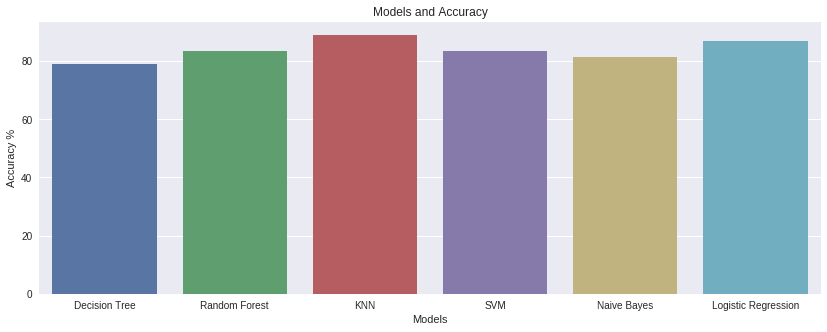

Respective accuracy: [79.12087912087912, 83.51648351648352, 89.01098901098901, 83.51648351648352, 81.31868131868131, 86.81318681318682]


In [69]:
def accuracy():
  dtree = accuracy_score(y_test,prediction_model2)
  rf = accuracy_score(y_test,prediction_model4)
  knn = accuracy_score(y1_test,prediction_model5)
  svc = accuracy_score(y1_test,prediction_model7)
  nb = accuracy_score(y_test,prediction_model8)
  log = accuracy_score(y_test,prediction_model10)
  
  methods = ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'Naive Bayes', 'Logistic Regression']
  accuracy = [dtree*100, rf*100, knn*100, svc*100, nb*100, log*100]
  
  plt.figure(figsize=(14,5))
  sns.barplot(x=methods,y=accuracy)
  plt.xlabel('Models')
  plt.ylabel('Accuracy %')
  plt.title('Models and Accuracy')
  plt.show()
  print('Respective accuracy:', accuracy)
  
accuracy()
  
  

**Lets select the top 3 models and try on more evaluation metrics**

**1.) KNN**

**2.) Random Forest & Logistic Regression**

**3.) Naive bayes**


In [80]:
def pre_rec():
  
  print('KNN')
  print('precision_score', metrics.precision_score(y_test, prediction_model5))
  print('Recall_score', metrics.recall_score(y_test, prediction_model5))
  print('----------------------------------------------------------------------')
  
  print('Random Forest')
  print('precision_score', metrics.precision_score(y_test, prediction_model3))
  print('Recall_score', metrics.recall_score(y_test, prediction_model3))
  print('----------------------------------------------------------------------')
  
  print('Logistic regression')
  print('precision_score', metrics.precision_score(y_test, prediction_model10))
  print('Recall_score', metrics.recall_score(y_test, prediction_model10))
  print('----------------------------------------------------------------------')
  
  print('Naive Bayes')
  print('precision_score', metrics.precision_score(y_test, prediction_model8))
  print('Recall_score', metrics.recall_score(y_test, prediction_model8))
  print('----------------------------------------------------------------------')
  
pre_rec()

KNN
precision_score 0.8846153846153846
Recall_score 0.92
----------------------------------------------------------------------
Random Forest
precision_score 0.8571428571428571
Recall_score 0.84
----------------------------------------------------------------------
Logistic regression
precision_score 0.88
Recall_score 0.88
----------------------------------------------------------------------
Naive Bayes
precision_score 0.8235294117647058
Recall_score 0.84
----------------------------------------------------------------------


In [70]:
def clas_report():
  
  print('KNN_classification report')
  print(classification_report(y_test, prediction_model5))
  print('___________________________________________________________')
  print('Random Forest report')
  print(classification_report(y_test, prediction_model3))
  print('___________________________________________________________')
  print('Logistic regression report')
  print(classification_report(y_test, prediction_model10))
  print('___________________________________________________________')
  print('Naive Bayes report')
  print(classification_report(y_test, prediction_model8))
  print('___________________________________________________________')
  
clas_report()

KNN_classification report
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        41
           1       0.88      0.92      0.90        50

   micro avg       0.89      0.89      0.89        91
   macro avg       0.89      0.89      0.89        91
weighted avg       0.89      0.89      0.89        91

___________________________________________________________
Random Forest report
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.86      0.84      0.85        50

   micro avg       0.84      0.84      0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91

___________________________________________________________
Logistic regression report
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.88      0.88      0.88

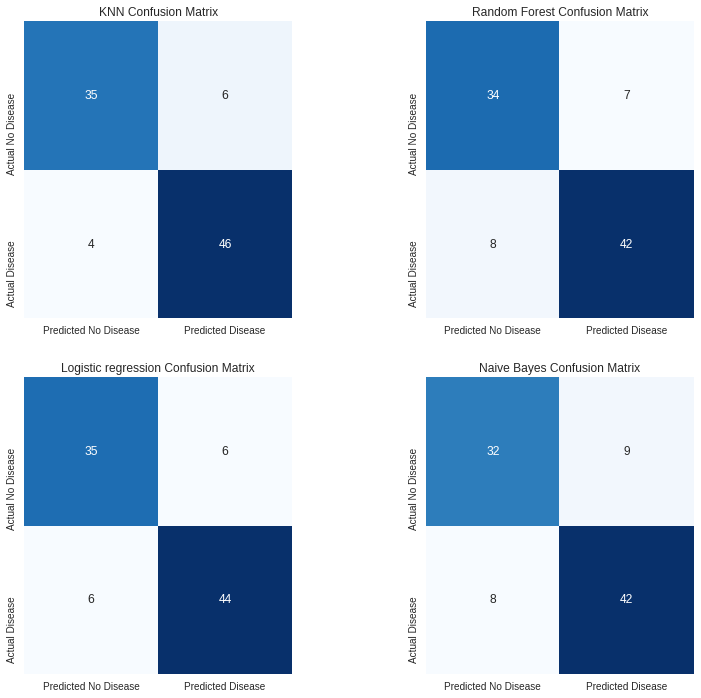

In [71]:
def con_matrix():
  
  plt.figure(figsize=(12,12))

  plt.subplots_adjust(wspace = 0.5, hspace=0.2)

  plt.subplot(2,2,1)
  plt.title('KNN Confusion Matrix')
  sns.heatmap(model5_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)

  plt.subplot(2,2,2)
  plt.title('Random Forest Confusion Matrix')
  sns.heatmap(model3_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)

  plt.subplot(2,2,3)
  plt.title('Logistic regression Confusion Matrix')
  sns.heatmap(model10_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
            
  plt.subplot(2,2,4)
  plt.title('Naive Bayes Confusion Matrix')
  sns.heatmap(model8_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
            
  plt.show()
            
con_matrix()            

**Evaluating using ROC_AUC Curve for the top 3 models**

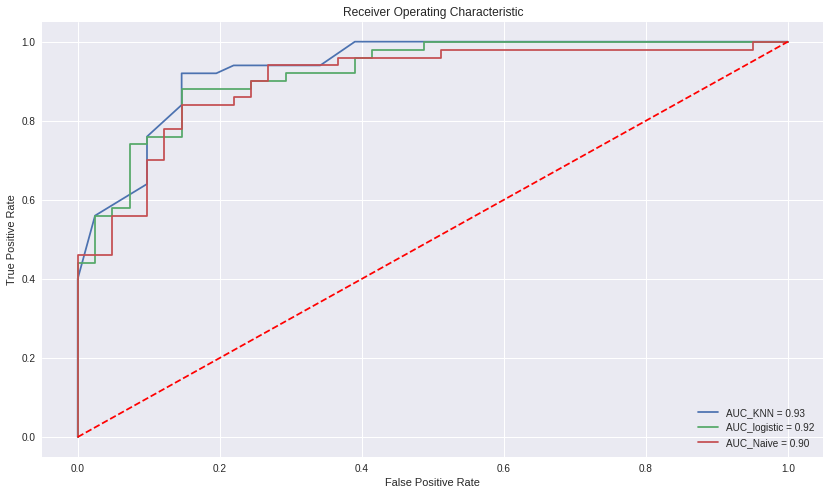

0.90 - 1.00 = excellent
0.80 - 0.90 = good
0.70 - 0.80 = fair
0.60 - 0.70 = poor
0.50 - 0.60 = fail


In [74]:
def metric():
  probs1 = Model5.predict_proba(X1_test)
  preds1 = probs1[:,1]
  fpr1, tpr1, threshold1 = metrics.roc_curve(y1_test, preds1)
  roc_auc1 = metrics.auc(fpr1,tpr1)
  
  probs2 = Model10.predict_proba(X_test)
  preds2 = probs2[:,1]
  fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, preds2)
  roc_auc2 = metrics.auc(fpr2,tpr2)
  
  probs3 = Model8.predict_proba(X_test)
  preds3 = probs3[:,1]
  fpr3, tpr3, threshold3 = metrics.roc_curve(y_test, preds3)
  roc_auc3 = metrics.auc(fpr3,tpr3)
  
  
  plt.figure(figsize=(14,8))
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr1, tpr1, label = 'AUC_KNN = %0.2f' % roc_auc1)
  plt.plot(fpr2, tpr2, label = 'AUC_logistic = %0.2f' % roc_auc2)
  plt.plot(fpr3, tpr3, label = 'AUC_Naive = %0.2f' % roc_auc3)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()
  print('0.90 - 1.00 = excellent')
  print('0.80 - 0.90 = good')
  print('0.70 - 0.80 = fair')
  print('0.60 - 0.70 = poor')
  print('0.50 - 0.60 = fail')
   
metric()

**Area Under curve is good for all the 3 models.**

**However *K-Nearest Neigbhors* has the best accuracy score and passes very well in all the evaluation metrics**